In [6]:
import numpy as np
import matplotlib.pyplot as plt
import os

In [7]:
pretrain_model_num_correct = (np.load("base_model_few_shot_accuracy/triviaqa/test_12.npy")==0).sum(axis=-1)

In [8]:
bins = np.array([0, 2, 4, 6, 8, 10, 12])

Text(0.5, 1.0, 'Test Predictions')

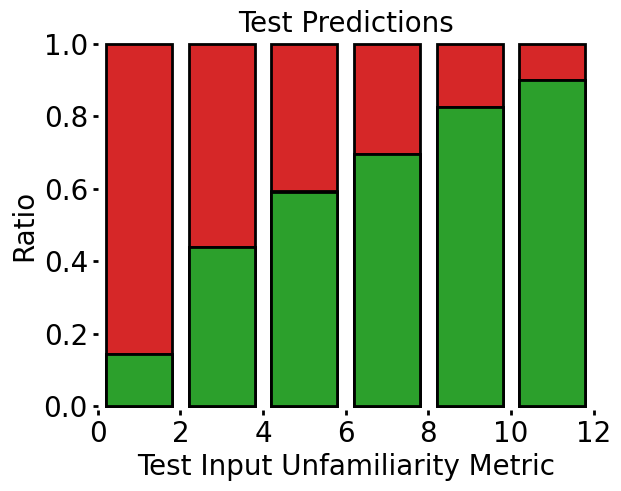

In [11]:
# model_path = "ckpts/sft_triviaqa_random_0/checkpoint_10000/hf_model/"
# model_path = "ckpts/sft_triviaqa_random_40/checkpoint_10000/hf_model/"
# model_path = "ckpts/sft_triviaqa_unfamiliar_40/checkpoint_10000/hf_model/"
# model_path = "ckpts/ppo_triviaqa_correct2_incorrect-3_idk0_kl0.1/checkpoint_030000/hf_model/"
model_path = "ckpts/ppo_triviaqa_correct2_incorrect-3_idk-3_kl0.1/checkpoint_030000/hf_model/"

test_samples_answer_types = np.load(os.path.join(model_path, "test_samples_answer_types_temp1.npy"))
answers_correct = (test_samples_answer_types==0)
answers_dont_know = (test_samples_answer_types==2)


accuracies = []
dont_know_frac = []

for i in range(len(bins) - 1):
    bin_lower = bins[i]
    bin_upper = bins[i + 1]

    indices = np.where((pretrain_model_num_correct >= bin_lower) & (pretrain_model_num_correct < bin_upper))[0]

    accuracies.append(np.mean(answers_correct[indices]))
    dont_know_frac.append(np.mean(answers_dont_know[indices]))

accuracies = np.array(accuracies)
dont_know_frac = np.array(dont_know_frac)

plt.bar([0, 1, 2, 3, 4, 5], [1, 1, 1, 1, 1, 1], color="tab:red", label = "False Answer Prediction", edgecolor='black',linewidth=2, width=0.8)
plt.bar([0, 1, 2, 3, 4, 5], accuracies+dont_know_frac, color="tab:blue", label="IDK Prediction", edgecolor='black',linewidth=2, width=0.8)
plt.bar([0, 1, 2, 3, 4, 5], accuracies, color="tab:green", label = "True Answer Prediction", edgecolor='black',linewidth=2, width=0.8)

plt.xlabel("Test Input Unfamiliarity Metric", fontsize=20)
plt.ylabel("Ratio", fontsize=20)
plt.ylim([-0.01, 1.01])
plt.xlim([-0, 4.5])

plt.xticks(np.array([0, 1, 2, 3, 4, 5, 6])-0.5, bins, fontsize=20)

plt.yticks(fontsize=20)
plt.tick_params(axis='both', which='major', width=2)
plt.box(False)

plt.title("Test Predictions", fontsize=20)
# plt.legend(fontsize=15, loc='lower left')

